In [1]:
using TaylorSeries, IntervalArithmetic, Plots, LaTeXStrings

In [2]:
Λ = Interval(3.5)
α = Λ/(Λ-1)

[1.39999, 1.40001]

In [3]:
K = Int64(floor(mid(Λ)))

3

In [4]:
q_K_k(k) = max(0, 0.5*((Λ-1-k)/(Λ-1)))
F(k) = x -> x + α*(k-(k^2-(k/α)*(k+1-2*x))^(0.5))

F (generic function with 1 method)

In [5]:
w = [q_K_k(i) for i in 1:K]

3-element Vector{Interval{Float64}}:
     [0.299999, 0.300001]
     [0.0999999, 0.100001]
 [0, 0]

In [23]:
w[2].hi

0.1

In [24]:
w[1].hi

0.30000000000000004

In [25]:
w[3].hi

0.0

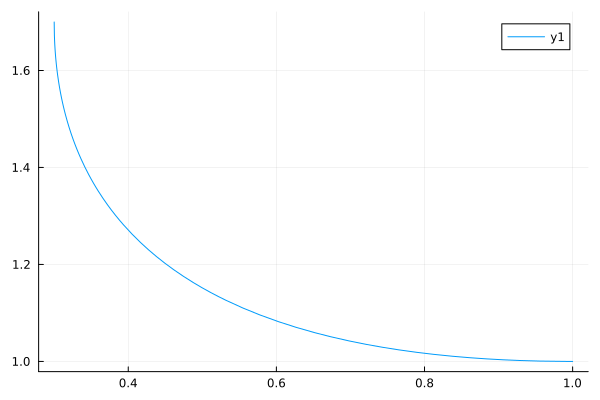

In [6]:
f1 = F(1)
I1 = interval(w[1].hi, 1)
plot(x->mid(f1(x),1), w[1].hi, 1)

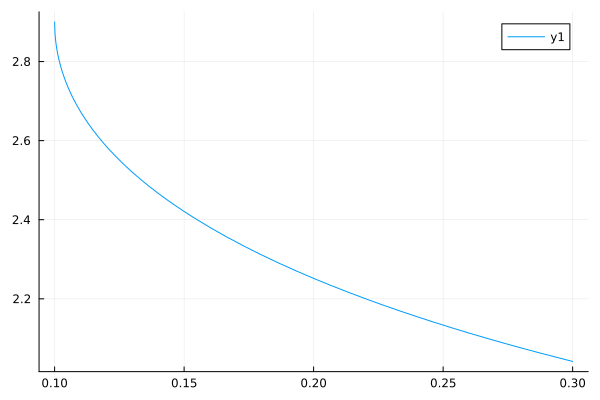

In [7]:
f2 = F(2)
I2 = interval(w[2].hi, w[1].hi)
plot(x->mid(f2(x),1), w[2].hi, w[1].hi)

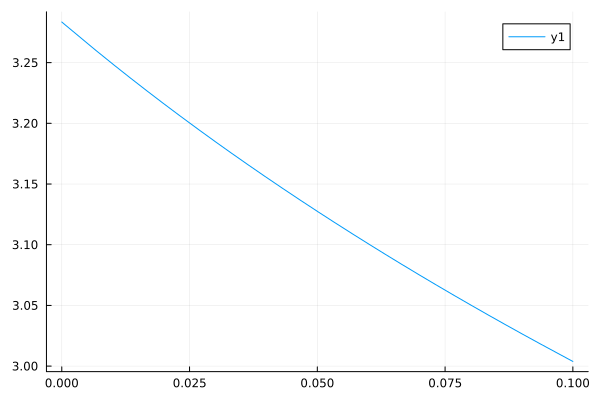

In [8]:
f3 = F(3)
I3 = interval(0, w[2].hi)
plot(x->mid(f3(x),1), w[3].hi, w[2].hi)

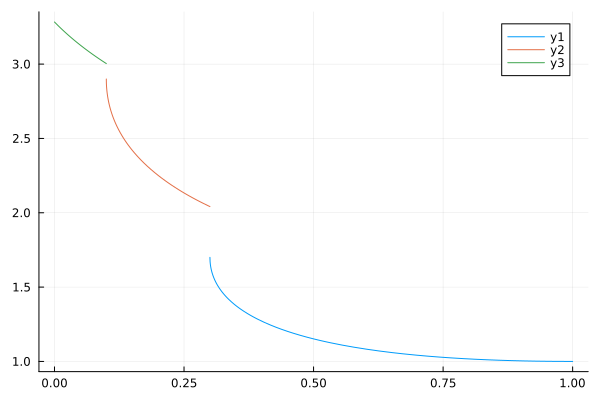

In [9]:
plot(x->mid(f1(x),1), w[1].hi, 1)
plot!(x->mid(f2(x),1), w[2].hi, w[1].hi)
plot!(x->mid(f3(x),1), w[3].hi, w[2].hi)

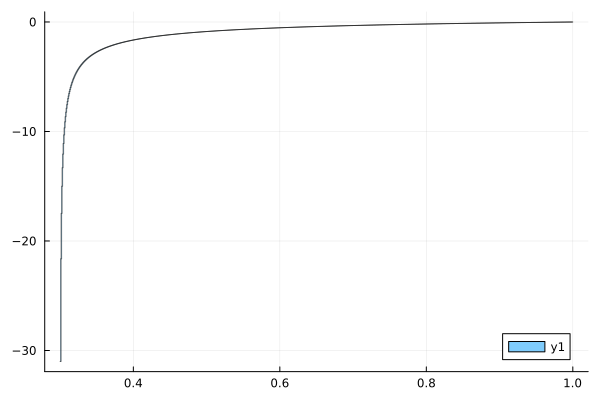

In [10]:
In1 = [I1.lo + ((interval(i, i+1))/1024)*(I1.hi-I1.lo) for i in 0:1023]
Ct1 = [f1(Taylor1([x, 1], 100))[1] for x in In1]
rect1 = In1 .× Ct1 
plot(rect1)

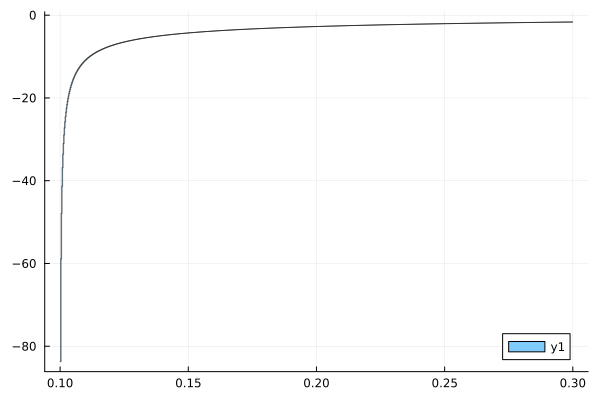

In [12]:
In2 = [I2.lo + ((interval(i, i+1))/1024)*(I2.hi-I2.lo) for i in 0:1023]
Ct2 = [f2(Taylor1([x, 1], 100))[1] for x in In2]
rect2 = In2 .× Ct2 
plot(rect2)

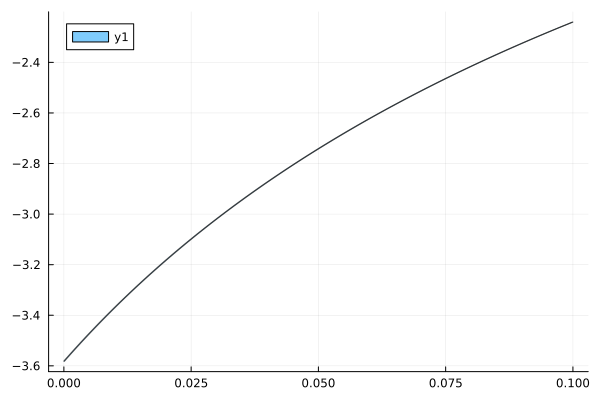

In [11]:
In3 = [I3.lo + ((interval(i, i+1))/1024)*(I3.hi-I3.lo) for i in 0:1023]
Ct3 = [f3(Taylor1([x, 1], 100))[1] for x in In3]
rect3 = In3 .× Ct3 
plot(rect3)

In [14]:
C11 = abs(hull(Ct1))

[0, ∞]

In [15]:
(hull(Ct1))

[-∞, 2.22045e-16]

In [16]:
C22 = abs(hull(Ct2))

[1.64575, ∞]

In [17]:
hull(Ct2)

[-∞, -1.64575]

In [18]:
C33 = abs(hull(Ct3))

[2.24037, 3.58258]

In [19]:
hull(Ct3)

[-3.58258, -2.24037]

#### This example there exist an ivariant set. How are we going to find it so we can cut out the part of the interval where the derivative has a problem?(0.875)